In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

In [2]:
#load in the training CSV to be cleaned
train_csv = pd.read_csv('./datasets/train.csv')

In [3]:
#look at columns
for column in train_csv.columns:
    print(column)

Id
PID
MS SubClass
MS Zoning
Lot Frontage
Lot Area
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Mas Vnr Area
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Heating
Heating QC
Central Air
Electrical
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
Kitchen Qual
TotRms AbvGrd
Functional
Fireplaces
Fireplace Qu
Garage Type
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Garage Cond
Paved Drive
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Pool QC
Fence
Misc Feature
Misc Val
Mo Sold
Yr Sold
Sale Type
SalePrice


In [4]:
#show correlation of numerical columns and sales price
train_csv.corr()['SalePrice']

Id                -0.051398
PID               -0.255052
MS SubClass       -0.087335
Lot Frontage       0.341842
Lot Area           0.296566
Overall Qual       0.800207
Overall Cond      -0.097019
Year Built         0.571849
Year Remod/Add     0.550370
Mas Vnr Area       0.512230
BsmtFin SF 1       0.423519
BsmtFin SF 2       0.016255
Bsmt Unf SF        0.190210
Total Bsmt SF      0.628925
1st Flr SF         0.618486
2nd Flr SF         0.248452
Low Qual Fin SF   -0.041594
Gr Liv Area        0.697038
Bsmt Full Bath     0.283662
Bsmt Half Bath    -0.045328
Full Bath          0.537969
Half Bath          0.283001
Bedroom AbvGr      0.137067
Kitchen AbvGr     -0.125444
TotRms AbvGrd      0.504014
Fireplaces         0.471093
Garage Yr Blt      0.533922
Garage Cars        0.648220
Garage Area        0.650270
Wood Deck SF       0.326490
Open Porch SF      0.333476
Enclosed Porch    -0.135656
3Ssn Porch         0.048732
Screen Porch       0.134581
Pool Area          0.023106
Misc Val          -0

In [5]:
#look at cololumns with null values
for column in train_csv.columns:
    if train_csv[column].isnull().sum() > 0:
        print(column, train_csv[column].isnull().sum())

Lot Frontage 330
Alley 1911
Mas Vnr Type 22
Mas Vnr Area 22
Bsmt Qual 55
Bsmt Cond 55
Bsmt Exposure 58
BsmtFin Type 1 55
BsmtFin SF 1 1
BsmtFin Type 2 56
BsmtFin SF 2 1
Bsmt Unf SF 1
Total Bsmt SF 1
Bsmt Full Bath 2
Bsmt Half Bath 2
Fireplace Qu 1000
Garage Type 113
Garage Yr Blt 114
Garage Finish 114
Garage Cars 1
Garage Area 1
Garage Qual 114
Garage Cond 114
Pool QC 2042
Fence 1651
Misc Feature 1986


In [6]:
#looking at lot frontage correlations to sales_price 
#I decide to clean the null values by running a linear regression model
#on lot area and lot frontage to predict the null values of lot frontage by using a lots area

In [7]:
# clean lot frontage values to create model
pre_null = train_csv.dropna(subset = ['Lot Frontage'])
X =  pre_null['Lot Frontage']
X.isnull().sum()

0

In [8]:
#mask null vlaues and set X to lot area
mask = (train_csv['Lot Frontage'].notnull())
X = train_csv[mask][['Lot Area']]

In [9]:
X.shape

(1721, 1)

In [10]:
#check if area has null values after the mask
X.isnull().sum()

Lot Area    0
dtype: int64

In [11]:
#set y to lot frontage values that are not null
non_nulls = list(X.index)
y = train_csv.loc[non_nulls ,'Lot Frontage']
y.head().isnull().sum()

0

In [12]:
y.shape

(1721,)

In [13]:
#instantiate and fit model
lot_lr = LinearRegression()
lot_lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
#not the best r score
lot_lr.score(X, y)

0.3295039166427828

In [15]:
#mask for choosing values that are null on lot frontage but have lot Area
#then predict values based of the values of lot_area testing data
null_mask = train_csv['Lot Frontage'].isnull()


In [16]:
frontage_predictions = lot_lr.predict(train_csv[null_mask][['Lot Area']])



In [17]:
train_csv[null_mask].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,...,0,0,NaN,NaN,NaN,0,7,2008,WD,198000


In [18]:
#check if lot frontage has null values 
train_csv.loc[train_csv["Lot Frontage"].isnull(), 'Lot Frontage'] = 0
train_csv['Lot Frontage'].isnull().sum()

0

In [19]:
#check prediction percentage
frontage_predictions.mean()

76.40958787705179

In [20]:
for i in train_csv['Lot Frontage'].index.values:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [21]:
#locate lot forntage area to set null values to predicted values to use later
i = 0
k = 0
for row in train_csv['Lot Frontage'].index.values:
    if train_csv.loc[row, 'Lot Frontage'] == 0:
        print(row)
        train_csv.loc[row, 'Lot Frontage'] = frontage_predictions[i]
        i += 1
        



0
7
8
23
27
31
42
50
59
62
71
75
76
90
91
94
106
108
111
114
117
118
122
125
141
142
148
150
160
161
166
169
176
177
192
200
208
210
221
223
226
236
250
253
262
268
284
285
290
293
295
309
310
311
320
327
328
333
334
335
337
339
346
370
372
375
389
403
411
416
428
430
435
444
446
452
453
454
463
469
471
482
490
500
504
511
514
515
531
541
543
545
547
549
553
555
557
560
561
570
572
575
576
593
595
603
626
628
639
660
661
668
671
680
681
691
694
716
727
731
732
733
737
742
745
747
748
750
757
760
764
765
767
781
811
818
827
830
835
849
850
864
871
875
876
877
913
919
921
926
927
938
941
944
950
957
966
971
980
982
1000
1004
1007
1009
1017
1030
1042
1048
1049
1052
1066
1067
1070
1079
1090
1105
1113
1114
1117
1121
1125
1142
1152
1165
1167
1173
1181
1183
1185
1203
1208
1211
1212
1216
1223
1233
1237
1240
1243
1244
1249
1259
1264
1271
1275
1277
1288
1293
1303
1306
1311
1313
1316
1333
1336
1338
1342
1357
1370
1372
1387
1393
1397
1398
1414
1420
1426
1427
1430
1436
1438
1450
1453
1458
1469
1475

In [ ]:
#lot frontage is now filled
train_csv['Lot Frontage'].isnull().sum()

I decded to only use data with correlations above .4 with sales price.
So after predicting data I drop lot frontage started changing ordinal values to
to nominal values to looks at correlations. Below are the colummns I decided to use based
on correlations values I found


In [49]:
#Columns I select to clean and use for training. 
#Most have at least a .5 correlational value with Sales price, This does not include the no
to_clean = train_csv[['Id',
                       'Lot Area',
                       'Overall Qual',
                       'Year Built', 
                       'Year Remod/Add',
                       'Mas Vnr Area',
                       'Exter Qual',
                       'Bsmt Qual',         
                       'Gr Liv Area',
                       'Full Bath',
                       'Half Bath',
                       'Total Bsmt SF',
                       'Garage Cars',
                       'Garage Area',
                       'Fireplaces',
                       'TotRms AbvGrd',
                       'Kitchen Qual',
                       'SalePrice',
                       ]]

In [50]:
to_clean.corr()['SalePrice']

Id               -0.051398
Lot Area          0.296566
Overall Qual      0.800207
Year Built        0.571849
Year Remod/Add    0.550370
Mas Vnr Area      0.512230
Gr Liv Area       0.697038
Full Bath         0.537969
Half Bath         0.283001
Total Bsmt SF     0.628925
Garage Cars       0.648220
Garage Area       0.650270
Fireplaces        0.471093
TotRms AbvGrd     0.504014
SalePrice         1.000000
Name: SalePrice, dtype: float64

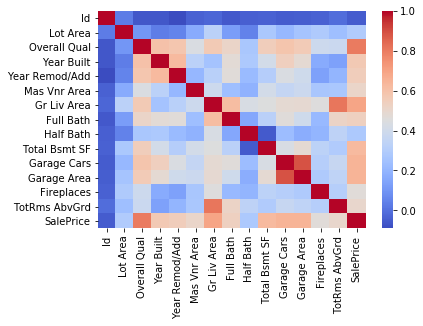

In [51]:
sns.heatmap(to_clean.corr(), cmap='coolwarm')   

In [52]:
#check data types
#I want change objects to in values
#I also change some float values to integer values
#becuase of some issues I encountered when building prediction models
to_clean.dtypes

Id                  int64
Lot Area            int64
Overall Qual        int64
Year Built          int64
Year Remod/Add      int64
Mas Vnr Area      float64
Exter Qual         object
Bsmt Qual          object
Gr Liv Area         int64
Full Bath           int64
Half Bath           int64
Total Bsmt SF     float64
Garage Cars       float64
Garage Area       float64
Fireplaces          int64
TotRms AbvGrd       int64
Kitchen Qual       object
SalePrice           int64
dtype: object

In [53]:
#check if there are null values in my selected columns to fix
to_clean.isnull().sum()

Id                 0
Lot Area           0
Overall Qual       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area      22
Exter Qual         0
Bsmt Qual         55
Gr Liv Area        0
Full Bath          0
Half Bath          0
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Fireplaces         0
TotRms AbvGrd      0
Kitchen Qual       0
SalePrice          0
dtype: int64

In [54]:
#change ordinal values to nominal, objects to floats if possible

In [55]:
#change exterior quality to a rating 
to_clean.loc[to_clean['Exter Qual'] == 'Po' , 'Exter Qual'] = 1
to_clean.loc[to_clean['Exter Qual'] == 'Fa' , 'Exter Qual'] = 2
to_clean.loc[to_clean['Exter Qual'] == 'TA' , 'Exter Qual'] = 3
to_clean.loc[to_clean['Exter Qual'] == 'Gd' , 'Exter Qual'] = 4
to_clean.loc[to_clean['Exter Qual'] == 'Ex' , 'Exter Qual'] = 5
to_clean.loc[to_clean['Exter Qual'].isnull(), 'Exter Qual'] = 0

to_clean['Exter Qual'].isnull().sum()

0

In [56]:
#check for nulls
to_clean['Exter Qual'].value_counts()

3    1247
4     697
5      81
2      26
Name: Exter Qual, dtype: int64

In [57]:
#change basement quality to a rating 
to_clean.loc[to_clean['Bsmt Qual'] == 'Po' , 'Bsmt Qual'] = 1
to_clean.loc[to_clean['Bsmt Qual'] == 'Fa' , 'Bsmt Qual'] = 2
to_clean.loc[to_clean['Bsmt Qual'] == 'TA' , 'Bsmt Qual'] = 3
to_clean.loc[to_clean['Bsmt Qual'] == 'Gd' , 'Bsmt Qual'] = 4
to_clean.loc[to_clean['Bsmt Qual'] == 'Ex' , 'Bsmt Qual'] = 5
to_clean.loc[to_clean['Bsmt Qual'].isnull(), 'Bsmt Qual'] = 0

to_clean['Bsmt Qual'].isnull().sum()

0

In [58]:
to_clean['Bsmt Qual'].value_counts()

3    887
4    864
5    184
2     60
0     55
1      1
Name: Bsmt Qual, dtype: int64

In [59]:
#change kitchen quality to int values
to_clean.loc[to_clean['Kitchen Qual'] == 'Po' , 'Kitchen Qual'] = 1
to_clean.loc[to_clean['Kitchen Qual'] == 'Fa' , 'Kitchen Qual'] = 2
to_clean.loc[to_clean['Kitchen Qual'] == 'TA' , 'Kitchen Qual'] = 3
to_clean.loc[to_clean['Kitchen Qual'] == 'Gd' , 'Kitchen Qual'] = 4
to_clean.loc[to_clean['Kitchen Qual'] == 'Ex' , 'Kitchen Qual'] = 5
to_clean.loc[to_clean['Kitchen Qual'].isnull(), 'Kitchen Qual'] = 0

to_clean['Kitchen Qual'].isnull().sum()

0

In [60]:
to_clean['Kitchen Qual'].value_counts()

3    1047
4     806
5     151
2      47
Name: Kitchen Qual, dtype: int64

In [61]:
#located 0 values to null values to change to zero
#doing this so later I can change these values form floats to ints
to_clean.loc[to_clean["Mas Vnr Area"].isnull(), 'Mas Vnr Area'] = 0
to_clean['Mas Vnr Area'].isnull().sum()

0

In [62]:
to_clean.loc[to_clean['Total Bsmt SF'].isnull(), 'Total Bsmt SF'] = 0
to_clean['Total Bsmt SF'].isnull().sum()

0

In [63]:
to_clean.loc[to_clean['Garage Cars'].isnull(), 'Garage Cars'] = 0
to_clean['Garage Cars'].isnull().sum()

0

In [64]:
to_clean.loc[to_clean['Garage Area'].isnull(), 'Garage Area'] = 0
to_clean['Garage Area'].isnull().sum()

0

In [65]:
#change float values to integers
to_clean[['Total Bsmt SF','Garage Cars','Garage Area']] = to_clean[['Total Bsmt SF','Garage Cars','Garage Area']].astype(int)
to_clean.dtypes

Id                  int64
Lot Area            int64
Overall Qual        int64
Year Built          int64
Year Remod/Add      int64
Mas Vnr Area      float64
Exter Qual          int64
Bsmt Qual           int64
Gr Liv Area         int64
Full Bath           int64
Half Bath           int64
Total Bsmt SF       int64
Garage Cars         int64
Garage Area         int64
Fireplaces          int64
TotRms AbvGrd       int64
Kitchen Qual        int64
SalePrice           int64
dtype: object

In [66]:
to_clean.dtypes

Id                  int64
Lot Area            int64
Overall Qual        int64
Year Built          int64
Year Remod/Add      int64
Mas Vnr Area      float64
Exter Qual          int64
Bsmt Qual           int64
Gr Liv Area         int64
Full Bath           int64
Half Bath           int64
Total Bsmt SF       int64
Garage Cars         int64
Garage Area         int64
Fireplaces          int64
TotRms AbvGrd       int64
Kitchen Qual        int64
SalePrice           int64
dtype: object

In [67]:
to_clean.isnull().sum()

Id                0
Lot Area          0
Overall Qual      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
Exter Qual        0
Bsmt Qual         0
Gr Liv Area       0
Full Bath         0
Half Bath         0
Total Bsmt SF     0
Garage Cars       0
Garage Area       0
Fireplaces        0
TotRms AbvGrd     0
Kitchen Qual      0
SalePrice         0
dtype: int64

In [47]:
#export clean data to new file to use in prediction models
to_clean.to_csv('./datasets/cleaned.csv')